In [10]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt 
import logging
import matplotlib.dates as mdates
   
PATH_TO_DATA = r'/Users/nadiiapoliakovska/Documents/Air_Pollution (Justin)'
PM25_pattern = r'Cal_PM2.5*.csv'
CO_pattern = r'Cal_CO*.csv'
EPA_O_3_pattern = r'EPA_O_3.csv'
    
class State:

    def __init__(self, path_to_folder, pattern):
        self.path_to_folder = path_to_folder
        self.pattern = pattern
    
    def create_df(self): 
        '''path_to_folder can be assigned to PATH_TO_DATA
        pattern for California is
        r'Cal_PM2.5*.csv' or
        r'Cal_CO*.csv' or
        r'EPA_O_3.csv' '''
        logging.basicConfig(level=logging.ERROR)
        files = glob.glob(os.path.join(self.path_to_folder, self.pattern))
        if len(files) > 1:
            df_list = []
            for i in files:
                df = pd.read_csv(i)
                df_list.append(df)
            big_df = pd.concat(df_list, ignore_index = True)
        elif len(files) == 1:
            big_df = pd.read_csv(files[0])
        else:
            big_df = "No files in the folder with this pattern"
        return big_df 
    
    def county_names(self):
        df = State(self.path_to_folder, self.pattern).create_df()
        return df['COUNTY'].unique()

In [11]:
California = State(PATH_TO_DATA, EPA_O_3_pattern)
California_df = California.create_df()

/var/folders/w0/vxwyx06126l456l8k0l589cc0000gn/T/ipykernel_68498/512270146.py:35: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  big_df = pd.read_csv(files[0])


In [3]:
California_df

,Unnamed: 0,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,...,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,0,1/1/1980,AQS,60010004,1,0.003,ppm,3,Oakland-Jackson St.,17,...,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
1,1,1/2/1980,AQS,60010004,1,0.000,ppm,0,Oakland-Jackson St.,17,...,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
2,2,1/3/1980,AQS,60010004,1,0.008,ppm,7,Oakland-Jackson St.,17,...,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
3,3,1/4/1980,AQS,60010004,1,0.008,ppm,7,Oakland-Jackson St.,17,...,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
4,4,1/5/1980,AQS,60010004,1,0.005,ppm,5,Oakland-Jackson St.,17,...,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397192,2397192,8/5/2022,AirNow,61131003,1,0.029,ppm,27,Woodland-Gibson Road,24,...,44201,Ozone,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
2397193,2397193,8/6/2022,AirNow,61131003,1,0.035,ppm,32,Woodland-Gibson Road,24,...,44201,Ozone,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
2397194,2397194,8/9/2022,AirNow,61131003,1,0.037,ppm,34,Woodland-Gibson Road,24,...,44201,Ozone,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
2397195,2397195,8/10/2022,AirNow,61131003,1,0.038,ppm,35,Woodland-Gibson Road,24,...,44201,Ozone,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690


In [12]:
California_df = California_df.set_index('Unnamed: 0')
California_df

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,1/1/1980,AQS,60010004,1,0.003,ppm,3,Oakland-Jackson St.,17,100,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
1,1/2/1980,AQS,60010004,1,0.000,ppm,0,Oakland-Jackson St.,17,100,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
2,1/3/1980,AQS,60010004,1,0.008,ppm,7,Oakland-Jackson St.,17,100,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
3,1/4/1980,AQS,60010004,1,0.008,ppm,7,Oakland-Jackson St.,17,100,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
4,1/5/1980,AQS,60010004,1,0.005,ppm,5,Oakland-Jackson St.,17,100,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397192,8/5/2022,AirNow,61131003,1,0.029,ppm,27,Woodland-Gibson Road,24,100,44201,Ozone,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
2397193,8/6/2022,AirNow,61131003,1,0.035,ppm,32,Woodland-Gibson Road,24,100,44201,Ozone,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
2397194,8/9/2022,AirNow,61131003,1,0.037,ppm,34,Woodland-Gibson Road,24,100,44201,Ozone,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690


In [13]:
California_df.describe()

,Site ID,POC,Daily Max 8-hour Ozone Concentration,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,2.397197e+06,2.397197e+06,2.397197e+06,2.397197e+06,2.397197e+06,2397197.0,2.305947e+06,2397197.0,2.397197e+06,2.397197e+06,2.397197e+06
mean,6.061185e+07,1.025477e+00,4.411878e-02,1.699671e+01,9.955178e+01,44201.0,3.696194e+04,6.0,6.103859e+01,3.602393e+01,-1.197200e+02
std,2.938896e+05,2.974097e-01,2.037717e-02,8.741693e-01,3.162704e+00,0.0,8.598018e+03,0.0,2.938286e+01,2.152580e+00,2.002107e+00
min,6.001000e+07,1.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,44201.0,1.254000e+04,6.0,1.000000e+00,3.255216e+01,-1.242014e+02
25%,6.037120e+07,1.000000e+00,3.100000e-02,1.700000e+01,1.000000e+02,44201.0,3.108000e+04,6.0,3.700000e+01,3.413650e+01,-1.215355e+02
50%,6.067001e+07,1.000000e+00,4.100000e-02,1.700000e+01,1.000000e+02,44201.0,4.090000e+04,6.0,6.700000e+01,3.549158e+01,-1.198747e+02
75%,6.083101e+07,1.000000e+00,5.400000e-02,1.700000e+01,1.000000e+02,44201.0,4.194000e+04,6.0,8.300000e+01,3.793601e+01,-1.179526e+02
max,6.113100e+07,9.000000e+00,3.360000e-01,2.400000e+01,1.000000e+02,44201.0,4.970000e+04,6.0,1.130000e+02,4.184511e+01,-1.146021e+02


In [14]:
California_df.dtypes

Date                                     object
Source                                   object
Site ID                                   int64
POC                                       int64
Daily Max 8-hour Ozone Concentration    float64
UNITS                                    object
DAILY_AQI_VALUE                          object
Site Name                                object
DAILY_OBS_COUNT                           int64
PERCENT_COMPLETE                          int64
AQS_PARAMETER_CODE                        int64
AQS_PARAMETER_DESC                       object
CBSA_CODE                               float64
CBSA_NAME                                object
STATE_CODE                                int64
STATE                                    object
COUNTY_CODE                               int64
COUNTY                                   object
SITE_LATITUDE                           float64
SITE_LONGITUDE                          float64
dtype: object

In [15]:
California_df['COUNTY'].unique()

array(['Alameda', 'Butte', 'Colusa', 'Contra Costa', 'El Dorado',
       'Fresno', 'Glenn', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Los Angeles', 'Marin', 'Mendocino', 'Monterey', 'Napa', 'Orange',
       'Placer', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter',
       'Tulare', 'Ventura', 'Yolo', 'Madera', 'Siskiyou', 'Merced',
       'Mono', 'Del Norte', 'Mariposa', 'Tuolumne', 'Nevada', 'Tehama',
       'Humboldt', 'Amador', 'Plumas', 'Calaveras'], dtype=object)

In [16]:
California_df['Month'] = pd.DatetimeIndex(California_df['Date']).month
California_df['Year_Month'] = pd.DatetimeIndex(California_df['Date']).to_period('M')
California_df['Year'] = pd.DatetimeIndex(California_df['Date']).year

In [17]:
California_df.loc[:,'Date'] = California_df.loc[:, 'Date'].apply(pd.to_datetime)
#California_df = California_df.sort_values(by=['Date'])

In [18]:
California_df

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Month,Year_Month,Year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1980-01-01 00:00:00,AQS,60010004,1,0.003,ppm,3,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
1,1980-01-02 00:00:00,AQS,60010004,1,0.000,ppm,0,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
2,1980-01-03 00:00:00,AQS,60010004,1,0.008,ppm,7,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
3,1980-01-04 00:00:00,AQS,60010004,1,0.008,ppm,7,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
4,1980-01-05 00:00:00,AQS,60010004,1,0.005,ppm,5,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397192,2022-08-05 00:00:00,AirNow,61131003,1,0.029,ppm,27,Woodland-Gibson Road,24,100,...,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690,8,2022-08,2022
2397193,2022-08-06 00:00:00,AirNow,61131003,1,0.035,ppm,32,Woodland-Gibson Road,24,100,...,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690,8,2022-08,2022
2397194,2022-08-09 00:00:00,AirNow,61131003,1,0.037,ppm,34,Woodland-Gibson Road,24,100,...,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690,8,2022-08,2022


In [33]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark import SQLContext
from pyspark.sql.functions import mean

# Create a SparkSession
#try:
#    spark
#except NameError:
spark = SparkSession.builder.appName("OzoneAggregation3").getOrCreate()
#spark = SparkSession.builder.appName("OzoneAggregation4").config("spark.executor.memory", "4g").getOrCreate()


#sc = SparkContext.getOrCreate()
#sqlContext = SQLContext(sc)


# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(California_df)

# Perform data preparation if needed
#spark_df = spark_df.withColumnRenamed("PandasColumnName", "SparkColumnName")

# Aggregate data by calculating the mean "Daily Max 8-hour Ozone Concentration" for each day
#aggregated_data = spark_df.groupBy("Year_Month").agg({"Daily Max 8-hour Ozone Concentration": "mean"})
aggregated_data = spark_df.groupBy('Date').agg(mean('Daily Max 8-hour Ozone Concentration').alias('Mean_O3_Concentration'))

California_df_agg = aggregated_data.toPandas()

# Show the aggregated data
aggregated_data.show()

# Stop the SparkSession
spark.stop()

ConnectionRefusedError: [Errno 61] Connection refused

In [34]:
spark.stop()

ConnectionRefusedError: [Errno 61] Connection refused

In [37]:
California_df_agg = pd.read_csv('California_df_agg.csv').set_index('Unnamed: 0')
California_df_agg

,Date,Mean_O3_Concentration
Unnamed: 0,,
0,1980-07-22,0.082521
1,1981-07-21,0.074898
2,1982-02-16,0.015125
3,1982-05-19,0.056183
4,1984-05-03,0.044065
...,...,...
15156,2016-08-31,0.046251
15157,2018-06-15,0.045563
15158,2018-06-29,0.048112


In [44]:
California_df_agg = California_df_agg.sort_values("Date")
California_df_agg = California_df_agg.reset_index().drop("Unnamed: 0", axis =1)
California_df_agg

,Date,Mean_O3_Concentration
0,1980-01-01,0.020627
1,1980-01-02,0.018404
2,1980-01-03,0.014922
3,1980-01-04,0.016277
4,1980-01-05,0.019131
...,...,...
15156,2022-08-08,0.046372
15157,2022-08-09,0.045448
15158,2022-08-10,0.043829
15159,2022-08-11,0.045861


In [51]:
California_df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15161 entries, 0 to 15160
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   15161 non-null  object 
 1   Mean_O3_Concentration  15161 non-null  float64
dtypes: float64(1), object(1)
memory usage: 237.0+ KB


In [54]:
California_df_agg['Date'][0]

'1980-01-01'

In [65]:
California_df_agg.loc[:,'Date'] = California_df_agg.loc[:, 'Date'].apply(pd.to_datetime)

California_df_agg['Month'] = pd.DatetimeIndex(California_df_agg['Date']).month
California_df_agg['Year_Month'] = pd.DatetimeIndex(California_df_agg['Date']).to_period('M')
California_df_agg['Year'] = pd.DatetimeIndex(California_df_agg['Date']).year

In [66]:
#Select data for the wet season
wet_df = California_df.loc[California_df['Month'].isin([1,2,3,11,12])]
wet_df

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Month,Year_Month,Year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1980-01-01 00:00:00,AQS,60010004,1,0.003,ppm,3,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
1,1980-01-02 00:00:00,AQS,60010004,1,0.000,ppm,0,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
2,1980-01-03 00:00:00,AQS,60010004,1,0.008,ppm,7,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
3,1980-01-04 00:00:00,AQS,60010004,1,0.008,ppm,7,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
4,1980-01-05 00:00:00,AQS,60010004,1,0.005,ppm,5,Oakland-Jackson St.,17,100,...,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.800484,-122.266358,1,1980-01,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397071,2022-03-27 00:00:00,AQS,61131003,1,0.034,ppm,31,Woodland-Gibson Road,17,100,...,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690,3,2022-03,2022
2397072,2022-03-28 00:00:00,AQS,61131003,1,0.032,ppm,30,Woodland-Gibson Road,17,100,...,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690,3,2022-03,2022
2397073,2022-03-29 00:00:00,AQS,61131003,1,0.037,ppm,34,Woodland-Gibson Road,17,100,...,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690,3,2022-03,2022


In [67]:
#Calculate the mean O3 value for wet season
mean_wet = wet_df['Daily Max 8-hour Ozone Concentration'].mean()
mean_wet

0.03267442569714384

In [71]:
"""
https://www.health.ny.gov/environmental/outdoors/air/ozone.htm
"""
healthy = 50 #Upper boundary of healthy O3 concentration in ppm
unhealthy = 101 #101 to 150 Unhealthy for Sensitive Groups
danger = 151 #151 to 200 Unhealthy

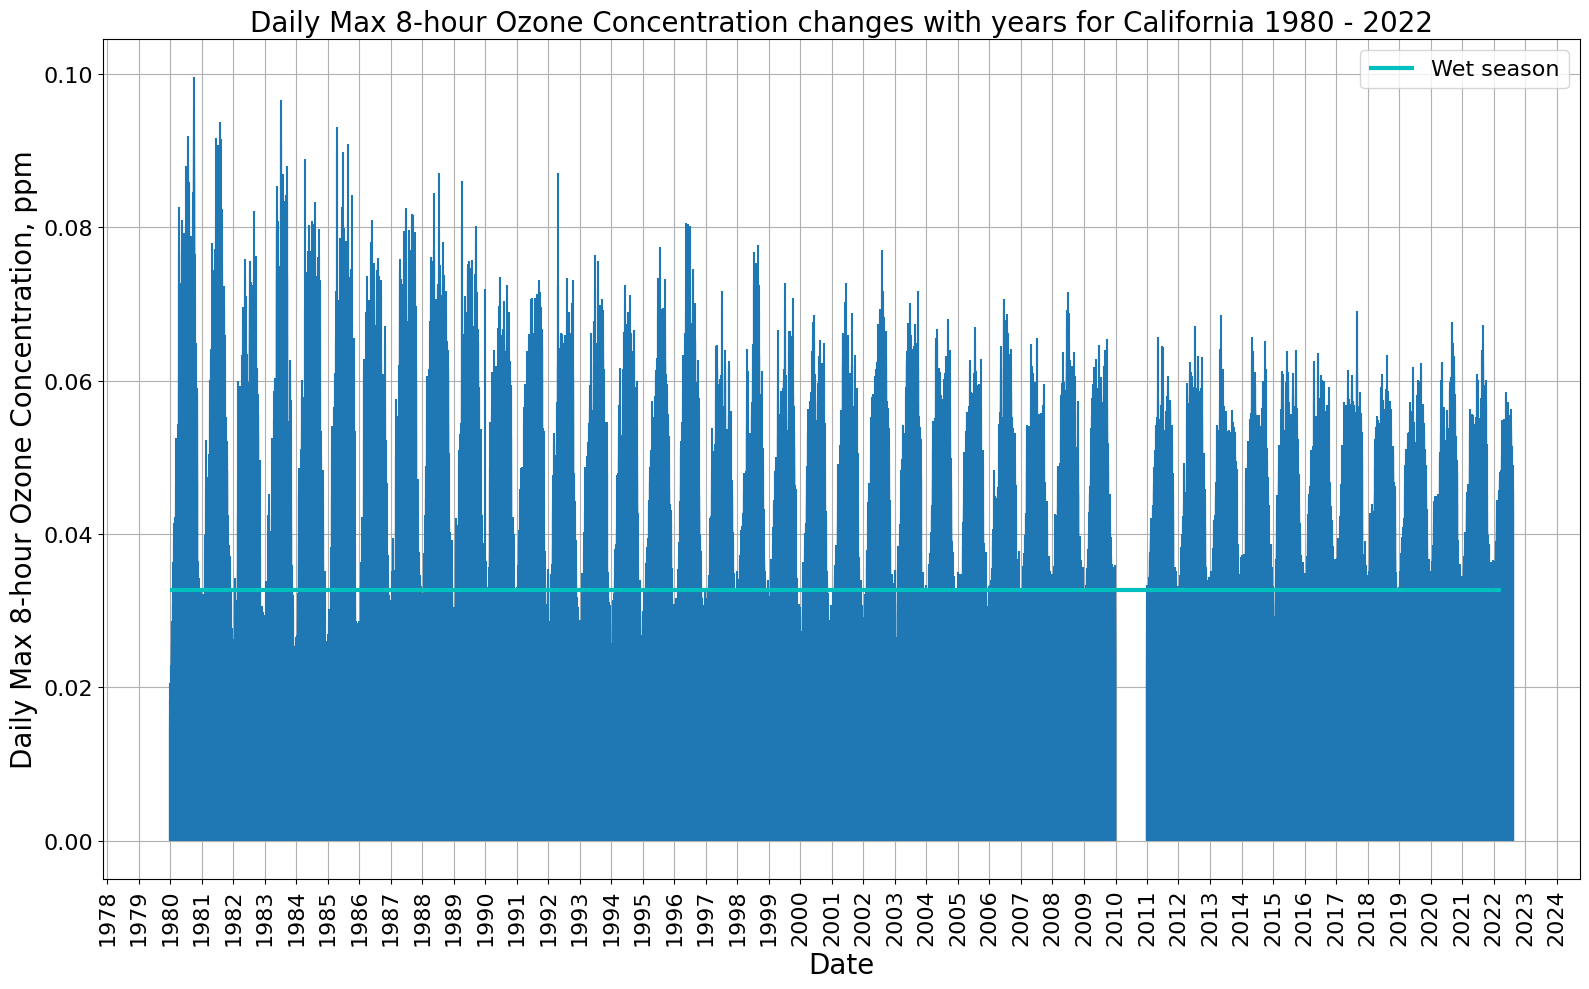

In [70]:
from matplotlib.dates import date2num

plt.figure(figsize = (16, 10))
x = California_df_agg['Date']
y = California_df_agg['Mean_O3_Concentration']
        
plt.stem(x, y, markerfmt=' ', basefmt=' ')  # No baseline for stems         
plt.hlines(y=mean_wet, xmin=date2num(wet_df['Date'].min()), xmax=date2num(wet_df['Date'].max()),
           label = 'Wet season', linewidth=3, color='c')# Horizontal line for the wet value
#plt.hlines(y=healthy, xmin=date2num(wet_df['Date'].min()), xmax=date2num(wet_df['Date'].max()),
#           label = 'Healthy', linewidth=3, color='g')# Horizontal line for the healthy value
#plt.hlines(y=unhealthy, xmin=date2num(wet_df['Date'].min()), xmax=date2num(wet_df['Date'].max()),
#           label = 'Unhealthy', linewidth=3, color='y')# Horizontal line for the unhealthy value
#plt.hlines(y=danger, xmin=date2num(wet_df['Date'].min()), xmax=date2num(wet_df['Date'].max()),
#           label = 'Danger', linewidth=3, color='r')# Horizontal line for the danger value


plt.gca().xaxis.set_major_locator(mdates.YearLocator())         
plt.xlabel('Date', fontsize=20)
plt.ylabel('Daily Max 8-hour Ozone Concentration, ppm', fontsize=20)
plt.title("Daily Max 8-hour Ozone Concentration changes with years for California 1980 - 2022", fontsize=20)
plt.grid()
# Increase the font size of x and y ticks
plt.xticks(fontsize=16, rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize = 16)
plt.savefig("Presentation/Daily Max 8-hour Ozone Concentration changes with years for California.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.tight_layout()
plt.show()

In [58]:
California_df_agg['Month'] = pd.DatetimeIndex(California_df_agg['Date']).month
California_df_agg['Year_Month'] = pd.DatetimeIndex(California_df_agg['Date']).to_period('M')
California_df_agg['Year'] = pd.DatetimeIndex(California_df_agg['Date']).year

/var/folders/w0/vxwyx06126l456l8k0l589cc0000gn/T/ipykernel_68498/2557155197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Mean_O3_Concentration', data=California_df_agg, palette='Set3')


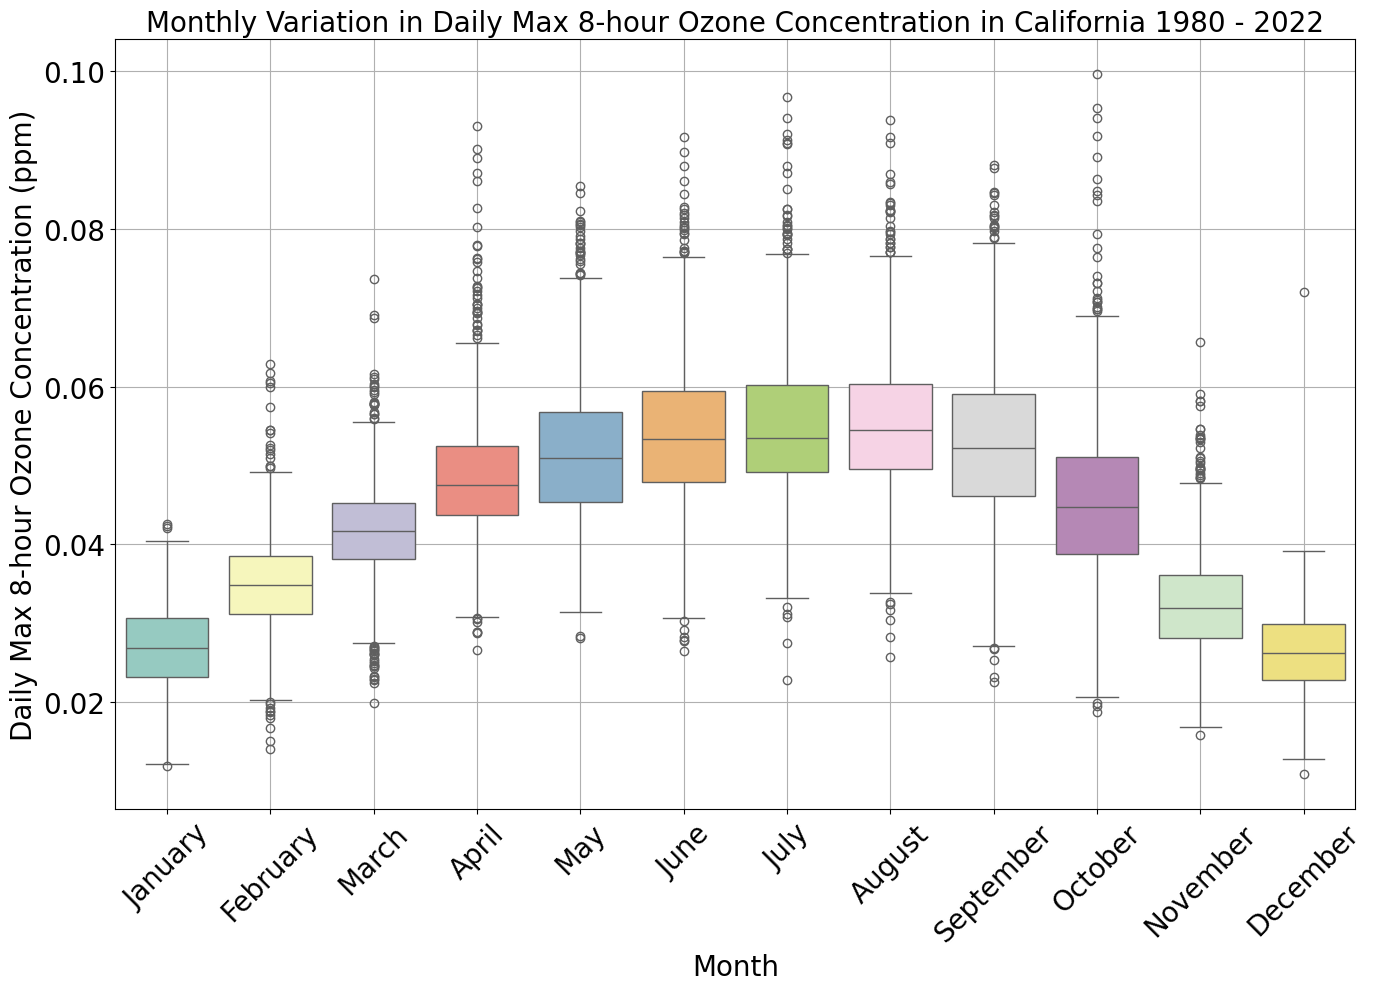

In [59]:
import seaborn as sns
import calendar
plt.figure(figsize=(16, 10))
sns.boxplot(x='Month', y='Mean_O3_Concentration', data=California_df_agg, palette='Set3')
plt.title('Monthly Variation in Daily Max 8-hour Ozone Concentration in California 1980 - 2022', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Daily Max 8-hour Ozone Concentration (ppm)', fontsize=20)
plt.grid()

plt.xticks(np.arange(0, 12), calendar.month_name[1:], rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("Presentation/Boxplot - Monthly Variation in Daily Max 8-hour Ozone Concentration for California.pdf", format="pdf", bbox_inches="tight")
plt.show()

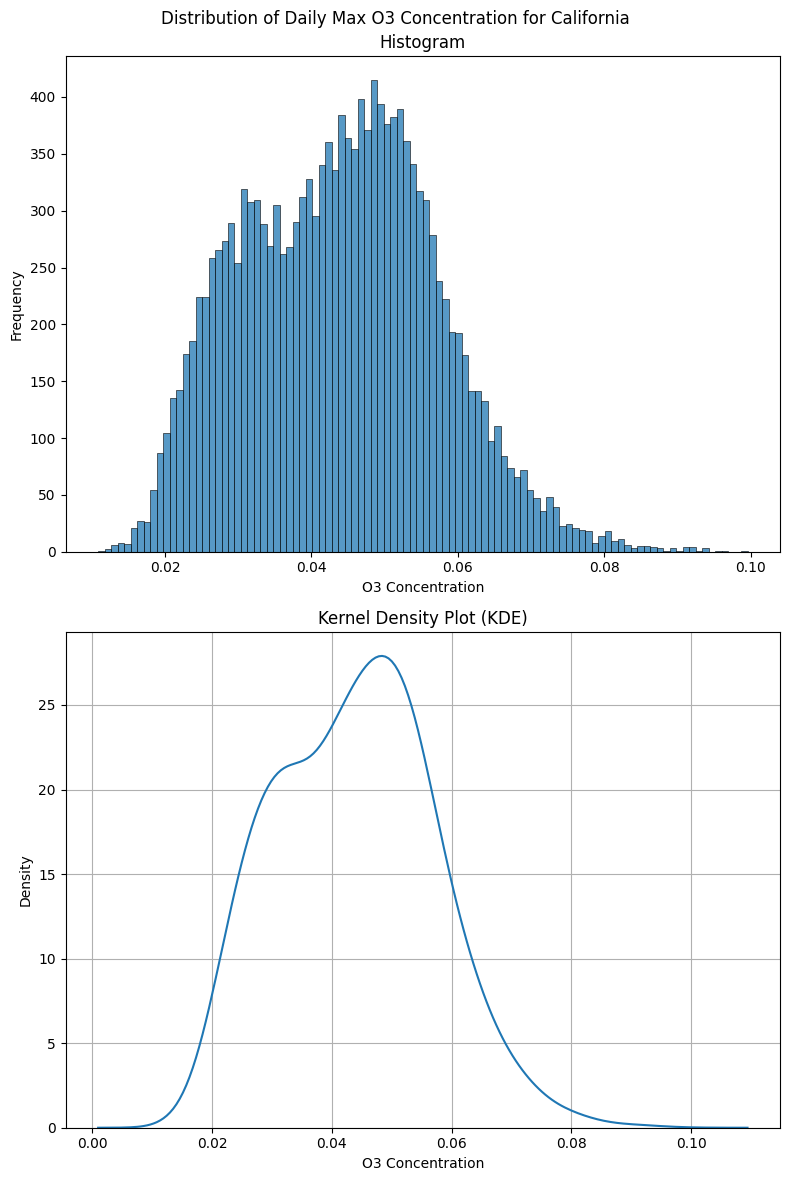

In [60]:
# Create subplots with histograms and KDE plots

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Histogram
sns.histplot(California_df_agg['Mean_O3_Concentration'], bins=100, kde=False, ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('O3 Concentration')
axes[0].set_ylabel('Frequency')

# KDE Plot
sns.kdeplot(California_df_agg['Mean_O3_Concentration'], ax=axes[1], bw_adjust = 1.7)
axes[1].set_title('Kernel Density Plot (KDE)')
axes[1].set_xlabel('O3 Concentration')
axes[1].set_ylabel('Density')

# Add a title for the entire plot
plt.suptitle('Distribution of Daily Max O3 Concentration for California')

# Show the plots
plt.tight_layout()
plt.grid()

plt.savefig("Presentation/Histogram - Distribution of Daily Max O3 Concentration for California.pdf", format="pdf", bbox_inches="tight")
plt.show()

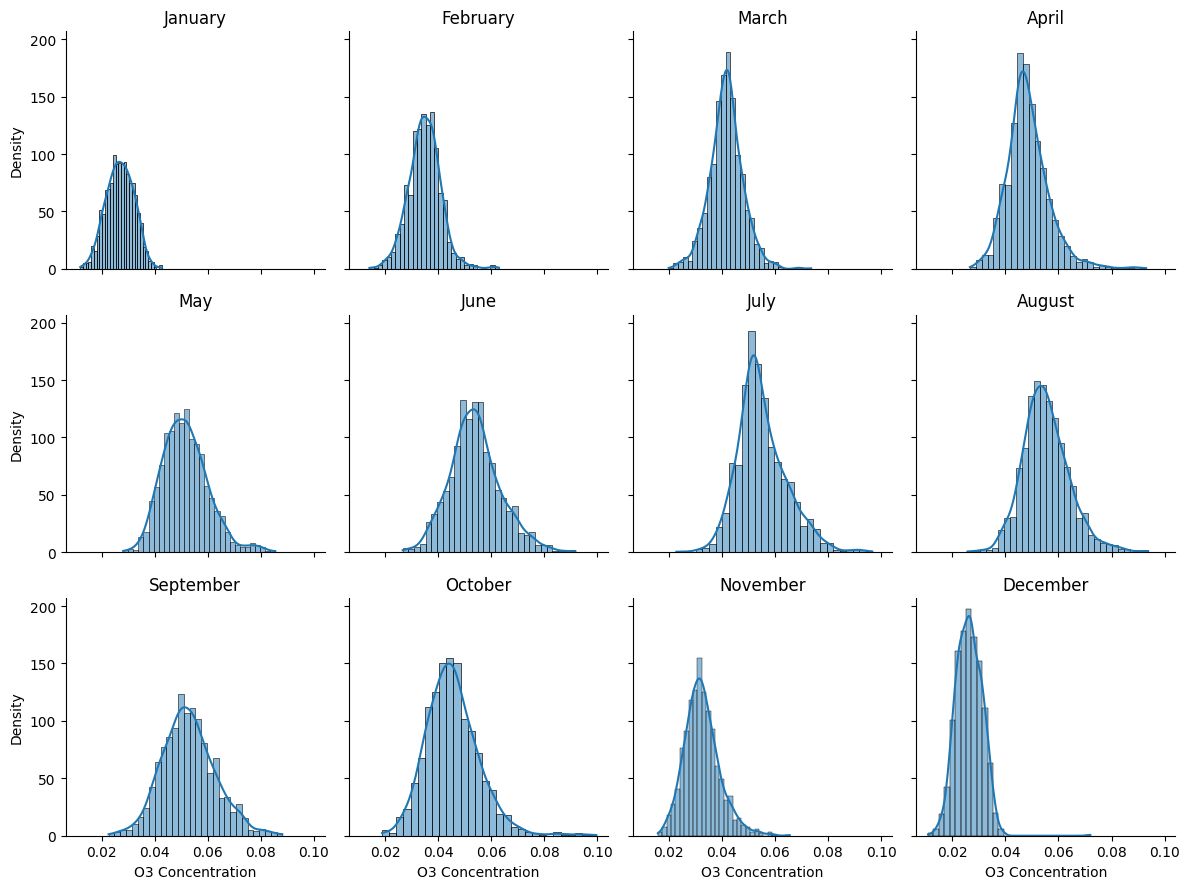

In [61]:
# Create subplots for each month
%matplotlib inline
import seaborn as sns
g = sns.FacetGrid(California_df_agg, col="Month", col_wrap=4, height=3, margin_titles=True)
g.map_dataframe(sns.histplot, x="Mean_O3_Concentration", bins=30, kde=True)
g.set_axis_labels("O3 Concentration", "Density")

# Add titles for each subplot
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
for ax, month in zip(g.axes.flat, range(1, 13)):
    ax.set_title(months[month])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/w0/vxwyx06126l456l8k0l589cc0000gn/T/ipykernel_68498/3714869997.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_pm25_by_month, x='Month', y='Mean_O3_Concentration', palette=clrs)


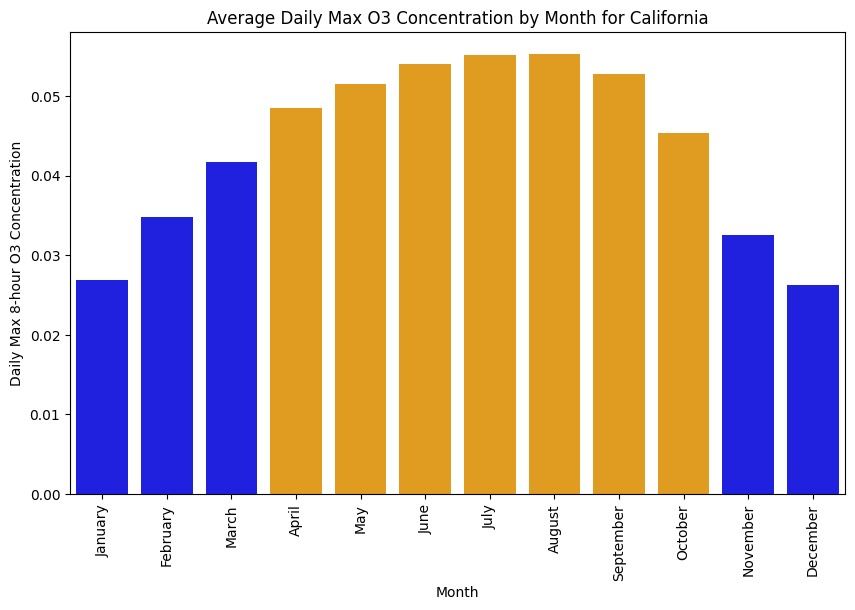

In [79]:
# Calculate the average O3 concentration for each month
average_pm25_by_month = California_df_agg.groupby('Month')['Mean_O3_Concentration'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
clrs = ['orange' if (3 < x < 11) else 'blue' for x in average_pm25_by_month.Month ]
sns.barplot(data=average_pm25_by_month, x='Month', y='Mean_O3_Concentration', palette=clrs)

# Customize the plot
plt.title('Average Daily Max O3 Concentration by Month for California')
plt.xlabel('Month')
plt.ylabel('Daily Max 8-hour O3 Concentration')
plt.xticks(range(12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                        'October', 'November', 'December'], rotation=90)

plt.savefig("Presentation/Barplot - Average Daily Max O3 Concentration by Month for California.pdf", format="pdf", bbox_inches="tight")
plt.show()

/var/folders/w0/vxwyx06126l456l8k0l589cc0000gn/T/ipykernel_68498/1428942290.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_pm25_by_year, x='Year', y='Mean_O3_Concentration', palette='viridis')


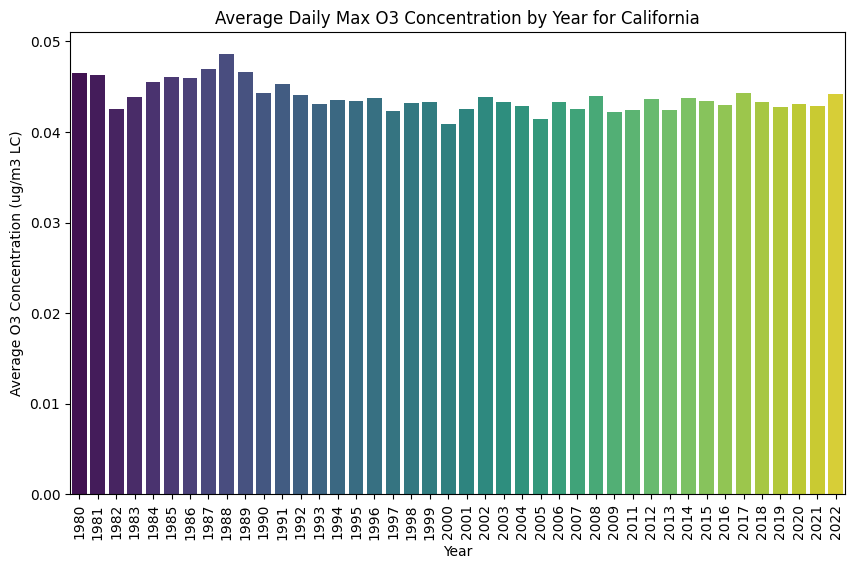

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average PM2.5 concentration for each year
average_pm25_by_year = California_df_agg.groupby('Year')['Mean_O3_Concentration'].mean().reset_index()

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_pm25_by_year, x='Year', y='Mean_O3_Concentration', palette='viridis')

# Customize the plot
plt.title('Average Daily Max O3 Concentration by Year for California')
plt.xlabel('Year')
plt.ylabel('Average O3 Concentration (ug/m3 LC)')

# Set x ticks for every year
plt.xticks(rotation=90)

plt.savefig("Presentation/Barplot - Average Daily Max O3 Concentration by Year for California.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

In [73]:
California_df_agg

,Date,Mean_O3_Concentration,Month,Year_Month,Year
0,1980-01-01 00:00:00,0.020627,1,1980-01,1980
1,1980-01-02 00:00:00,0.018404,1,1980-01,1980
2,1980-01-03 00:00:00,0.014922,1,1980-01,1980
3,1980-01-04 00:00:00,0.016277,1,1980-01,1980
4,1980-01-05 00:00:00,0.019131,1,1980-01,1980
...,...,...,...,...,...
15156,2022-08-08 00:00:00,0.046372,8,2022-08,2022
15157,2022-08-09 00:00:00,0.045448,8,2022-08,2022
15158,2022-08-10 00:00:00,0.043829,8,2022-08,2022
15159,2022-08-11 00:00:00,0.045861,8,2022-08,2022


In [72]:
#Selecting data for 2010 - 2019 years to add to the folium map to compare with wildfires
print(California_df_agg.Date.max())
print(California_df_agg.Date.min())

2022-08-12 00:00:00
1980-01-01 00:00:00


In [75]:
California_df_1019 = California_df[(California_df.Year <=2019) and (California_df.Year >= 2010)]

California_1019_grouped = California_df_1019[['Year', 'COUNTY', 'Mean_O3_Concentration']].groupby(['COUNTY', 'Year'], as_index=False).max()
California_1019_county_CO = California_1019_grouped[['COUNTY', 	'Mean_O3_Concentration']].groupby('COUNTY', as_index = False).mean()
California_1019_county_CO

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().